In [1]:
#packages
library(scorecard)
library(pROC)
library(dplyr)
library(ROCR)
library(caTools)
library(Information)

Warning message:
"package 'scorecard' was built under R version 3.6.3"Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ROCR' was built under R version 3.6.3"Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'Information' was built under R version 3.6.3"

# Read data

In [2]:
df <- read.csv('GermanCreditData.csv', header=TRUE)

# EDA

In [3]:
head(df)
sapply(df, class)
nrow(df)
ncol(df)
summary(df)
str(df)

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
2,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
3,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
4,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
5,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0
6,4,36,2,6,9055,5,3,2,3,1,...,35,3,3,1,2,2,2,1,0,1


Checking  Duration   History   Purpose    Amount   Savings   Emploed  Installp 
"integer" "integer" "integer"  "factor" "integer" "integer" "integer" "integer" 
  marital     Coapp  Resident  Property       Age     Other   housing   Existcr 
"integer" "integer" "integer" "integer" "integer" "integer" "integer" "integer" 
      Job   Depends Telephone   Foreign       Bad      Good 
"integer" "integer" "integer" "integer" "integer" "integer"

[1] 1000

[1] 22

    Checking        Duration       History         Purpose        Amount     
 Min.   :1.000   Min.   : 4.0   Min.   :0.000   3      :280   Min.   :  250  
 1st Qu.:1.000   1st Qu.:12.0   1st Qu.:2.000   0      :234   1st Qu.: 1366  
 Median :2.000   Median :18.0   Median :2.000   2      :181   Median : 2320  
 Mean   :2.577   Mean   :20.9   Mean   :2.545   1      :103   Mean   : 3271  
 3rd Qu.:4.000   3rd Qu.:24.0   3rd Qu.:4.000   9      : 97   3rd Qu.: 3972  
 Max.   :4.000   Max.   :72.0   Max.   :4.000   6      : 50   Max.   :18424  
                                                (Other): 55                  
    Savings         Emploed         Installp        marital     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :3.000   Median :3.000   Median :3.000  
 Mean   :2.105   Mean   :3.384   Mean   :2.973   Mean   :2.682  
 3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:4.000   3r

'data.frame':	1000 obs. of  22 variables:
 $ Checking : int  1 2 4 1 1 4 4 2 4 2 ...
 $ Duration : int  6 48 12 42 24 36 24 36 12 30 ...
 $ History  : int  4 2 4 2 3 2 2 2 2 4 ...
 $ Purpose  : Factor w/ 10 levels "0","1","2","3",..: 4 4 7 3 1 7 3 2 4 1 ...
 $ Amount   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Savings  : int  5 1 1 1 1 5 3 1 4 1 ...
 $ Emploed  : int  5 3 4 4 3 3 5 3 4 1 ...
 $ Installp : int  4 2 2 2 3 2 3 2 2 4 ...
 $ marital  : int  3 2 3 3 3 3 3 3 1 4 ...
 $ Coapp    : int  1 1 1 3 1 1 1 1 1 1 ...
 $ Resident : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Property : int  1 1 1 2 4 4 2 3 1 3 ...
 $ Age      : int  67 22 49 45 53 35 53 35 61 28 ...
 $ Other    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ housing  : int  2 2 2 3 3 3 2 1 2 2 ...
 $ Existcr  : int  2 1 1 1 2 1 1 1 1 2 ...
 $ Job      : int  3 3 2 3 3 2 3 4 2 4 ...
 $ Depends  : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Telephone: int  2 1 1 1 1 2 1 2 1 1 ...
 $ Foreign  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Bad      : 

# Data cleaning

##### missing data

In [4]:
#check for any NA values
for (i in 1:ncol(df)) {
    print(anyNA(df[,i]))
    print(i)
    }

[1] FALSE
[1] 1
[1] FALSE
[1] 2
[1] FALSE
[1] 3
[1] FALSE
[1] 4
[1] FALSE
[1] 5
[1] FALSE
[1] 6
[1] FALSE
[1] 7
[1] FALSE
[1] 8
[1] FALSE
[1] 9
[1] FALSE
[1] 10
[1] FALSE
[1] 11
[1] FALSE
[1] 12
[1] FALSE
[1] 13
[1] FALSE
[1] 14
[1] FALSE
[1] 15
[1] FALSE
[1] 16
[1] FALSE
[1] 17
[1] FALSE
[1] 18
[1] FALSE
[1] 19
[1] FALSE
[1] 20
[1] FALSE
[1] 21
[1] FALSE
[1] 22


no missing data

##### duplicated rows

In [5]:
df[duplicated(df),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


no duplicated rows

##### outliers

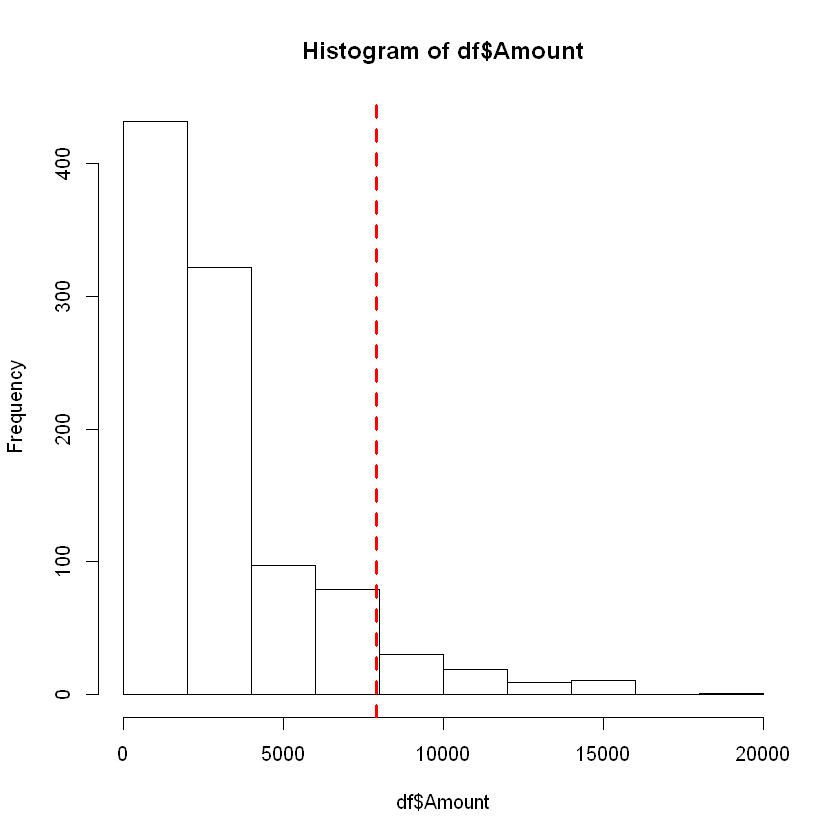

In [6]:
# check for outliers in amount column
hist(df$Amount)
abline(v = 7881, col="red", lwd=3, lty=2)

$Q3 + 1.5*{IGR}$

In [7]:
summary(df$Amount)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

In [8]:
3972 + 1.5*(3972-1366)

[1] 7881

Let's check how many rows are larger than 7881

In [9]:
nrow(df[df$Amount > 7881,])

[1] 73

We will apply binning so the outliers do not have as big of an influence

https://www.worldprogramming.com/blog/datascience/credit_scoring_pt3/

###### delete bad column

In [10]:
df <- df[-21]

###### convert to categorical data 

In [11]:
df$Checking<- as.factor(df$Checking)
df$History <- as.factor(df$History)
df$Savings <- as.factor(df$Savings)
df$Emploed <- as.factor(df$Emploed)
df$Installp<- as.factor(df$Installp)
df$marital <- as.factor(df$marital)
df$Coapp <- as.factor(df$Coapp)
df$Resident <- as.factor(df$Resident)
df$Property <- as.factor(df$Property)
df$Other <- as.factor(df$Other)
df$housing <- as.factor(df$housing)
df$Existcr<- as.factor(df$Existcr)
df$Job <- as.factor(df$Job)
df$Depends <- as.factor(df$Depends)
df$Telephone <- as.factor(df$Telephone)
df$Foreign <- as.factor(df$Foreign)

In [12]:
sapply(df, class)

Checking  Duration   History   Purpose    Amount   Savings   Emploed  Installp 
 "factor" "integer"  "factor"  "factor" "integer"  "factor"  "factor"  "factor" 
  marital     Coapp  Resident  Property       Age     Other   housing   Existcr 
 "factor"  "factor"  "factor"  "factor" "integer"  "factor"  "factor"  "factor" 
      Job   Depends Telephone   Foreign      Good 
 "factor"  "factor"  "factor"  "factor" "integer"

# data split into subset 1 and 2

Subset 1: Checking = 1 or 2

Subset 2: Checking = 3 or 4

In [13]:
print('Num of rows in subset 1')
nrow(df[df$Checking == 1 | df$Checking == 2,])
print('Num of rows in subset 2')
nrow(df[df$Checking == 3 | df$Checking == 4,])

[1] "Num of rows in subset 1"


[1] 543

[1] "Num of rows in subset 2"


[1] 457

In [14]:
# checking equal to 1 or 2
df12 <- df[df$Checking == 1 | df$Checking == 2,]

# checking equal to 3 or 4
df34 <- df[df$Checking == 3 | df$Checking == 4,]

In [15]:
# check you have the correct values in each subset
unique(df12$Checking)

unique(df34$Checking)

[1] 1 2
Levels: 1 2 3 4

[1] 4 3
Levels: 1 2 3 4

The data has been subsetted correctly 

# train test split

The data was first split into training and test data. This was the first step as it will prevent
data leakage. The training data is used to train the model, the test set is used to test all the models, and finally evaluate the performance of the model and the extent of under/over fitting. 

Not using validation set as we do not have a lot of data. If we did have more data I would use K-fold validation technique to evaluate the model.

Using a random selection of a 70/30 split, using the caTools package. Random selection to remove selection bias.

In [16]:
#set seed to get the same numbers
set.seed(23)

#split the data
data12 <- sample.split(df12,SplitRatio = 0.7)
#train data
train12 <- subset(df12,data12==TRUE)
#subsetting into Test data
test12 <- subset(df12,data12==FALSE)

#split the data
data34 <- sample.split(df34,SplitRatio = 0.7)
#train data
train34 <- subset(df34,data34==TRUE)
#subsetting into Test data
test34 <- subset(df34,data34==FALSE)

In [17]:
table(train12$Good)
table(test12$Good)
table(train34$Good)
table(test34$Good)


  0   1 
162 200 


  0   1 
 78 103 


  0   1 
 37 269 


  0   1 
 23 128 

train12 split 162:200  (bad/good)

test12 split 78:103

train34 split 37:269

test34 split 23:128

There is too few 'bad' oberservations

If I had more time I would use oversampling via SMOTE to fix the imbalance, in subset 2.

# Information value (variable selection)

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. 

https://multithreaded.stitchfix.com/blog/2015/08/13/weight-of-evidence/

https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

Rules related to Information Value

Less than 0.02	Not useful for prediction

0.02 to 0.1	Weak predictive Power

0.1 to 0.3	Medium predictive Power

0.3 to 0.5	Strong predictive Power

.>0.5	Suspicious Predictive Power

In [18]:
# for subset 1
IV12 <- Information::create_infotables(data=train12, y='Good',parallel=FALSE)
print(head(IV12$Summary), row.names=FALSE)

 Variable        IV
 Duration 0.3869891
 Property 0.2413046
  Savings 0.1823266
  History 0.1552563
   Amount 0.1399480
  Purpose 0.1301018


The variables being used to contruct a scorecard with subset 1 is: `Duration`,`History`,`Property` and `Savings`

This satisfies Q3:

At least one continuous variable before binning: `Duration`

At least one categorical variable, with more than 2 categories: `History`,`Property` and `Savings`

In [19]:
#for subset 2
IV34 <- Information::create_infotables(data=train34, y='Good',parallel=FALSE)
print(head(IV34$Summary), row.names=FALSE)

 Variable        IV
      Age 0.3438636
  History 0.3094196
   Amount 0.2846577
 Duration 0.2749467
  Purpose 0.2634082
  Emploed 0.2398153


The variables being used to constuct a scorecard with subset 2 is: `History`,`Age`, `Duration` and `Amount`

This satisfies Q3:

At least one continuous variable before binning: `Duration`, `Amount` and `Age`

At least one categorical variable, with more than 2 categories: `History`

In [20]:
# subset the training and test sets with just the chosen variables
train12 <- train12[,c(IV12$Summary[1:4,1], 'Good')]
test12 <- test12[,c(IV12$Summary[1:4,1], 'Good')]

train34 <- train34[,c(IV34$Summary[1:4,1], 'Good')]
test34 <- test34[,c(IV34$Summary[1:4,1], 'Good')]

# Binning

Bin the train data

In [21]:
train_bins12 <- woebin(train12, y='Good',method='tree')

train_bins34 <- woebin(train34, y='Good',method='tree')

[INFO] creating woe binning ... 
[INFO] creating woe binning ... 


Lets visualise the training bin for checking equal to 1 or 2 and the `Duration` column

In [22]:
train_bins12

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,12)",59,0.16298343,13,46,0.7796610,1.0529710,0.157685658,0.3894076,12,FALSE
Duration,"[12,22)",141,0.38950276,54,87,0.6170213,0.2662030,0.027063976,0.3894076,22,FALSE
Duration,"[22,26)",62,0.17127072,34,28,0.4516129,-0.4048770,0.028291408,0.3894076,26,FALSE
Duration,"[26,32)",24,0.06629834,10,14,0.5833333,0.1257512,0.001040164,0.3894076,32,FALSE
Duration,"[32, Inf)",76,0.20994475,51,25,0.3289474,-0.9236708,0.175326409,0.3894076,Inf,FALSE
variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Property,1,98,0.2707182,26,72,0.7346939,0.8078485,0.161170772,0.2413046,1,FALSE
Property,2,81,0.2237569,39,42,0.5185185,-0.1366131,0.004199587,0.2413046,2,FALSE


$Duration


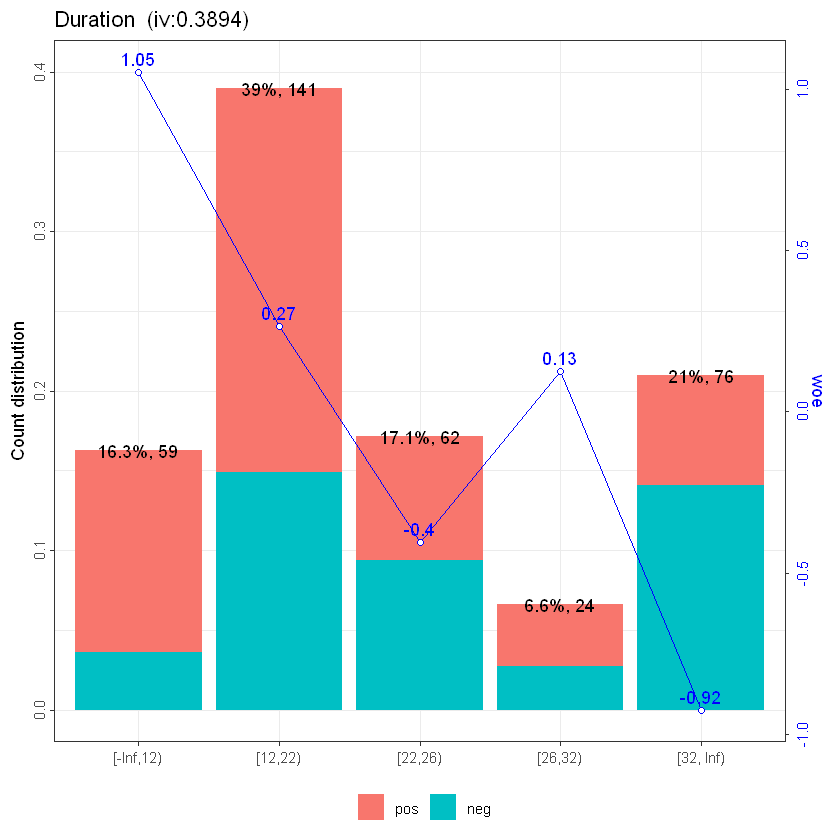

In [23]:
woebin_plot(train_bins12,x='Duration',line_value='woe')

## Coarse classification

I will manually create dummies for the bins

### checking 12

#### training data

###### Duration

In [24]:
# visualise the duration bin
train_bins12$Duration

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,12)",59,0.16298343,13,46,0.7796610,1.0529710,0.157685658,0.3894076,12,FALSE
Duration,"[12,22)",141,0.38950276,54,87,0.6170213,0.2662030,0.027063976,0.3894076,22,FALSE
Duration,"[22,26)",62,0.17127072,34,28,0.4516129,-0.4048770,0.028291408,0.3894076,26,FALSE
Duration,"[26,32)",24,0.06629834,10,14,0.5833333,0.1257512,0.001040164,0.3894076,32,FALSE
Duration,"[32, Inf)",76,0.20994475,51,25,0.3289474,-0.9236708,0.175326409,0.3894076,Inf,FALSE


In [25]:
# create binary variables for duration less than 12
dum_train12 <- mutate(train12, duration12=ifelse(Duration<12,1,0))

# create binary variables for duration more than or equal to 12 or less than 22
dum_train12 <- mutate(dum_train12, duration12_22=ifelse(Duration>=12&Duration<22,1,0))

# create binary variables for duration more than or equal to 22 or less than 26
dum_train12 <- mutate(dum_train12, duration22_26=ifelse(Duration>=22&Duration<26,1,0))

# create binary variables for duration more than or equal to 26 or less than 32
dum_train12 <- mutate(dum_train12, duration26_32=ifelse(Duration>=26&Duration<32,1,0))

# to avoid multi-collinearity we create N-1 bins

###### Savings

In [26]:
# visualise the savings bin
train_bins12$Savings

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Savings,"1%,%2",285,0.7872928,142,143,0.5017544,-0.2037035,0.03290691,0.18178,"1%,%2",FALSE
Savings,"3%,%4",26,0.0718232,5,21,0.8076923,1.2243635,0.09076917,0.18178,"3%,%4",FALSE
Savings,5,51,0.1408840,15,36,0.7058824,0.6647477,0.05810387,0.18178,5,FALSE


In [27]:
# create binary variables for savings equal to 1 or 2
dum_train12 <- mutate(dum_train12, savings1_2=ifelse(Savings==1|Savings==2,1,0))

# create binary variables for savings equal to 3 or 4
dum_train12 <- mutate(dum_train12, savings3_4=ifelse(Savings==3|Savings==4,1,0))

###### Property

In [28]:
# visualise the property bin
train_bins12$Property

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Property,1,98,0.2707182,26,72,0.7346939,0.8078485,0.161170772,0.2413046,1,FALSE
Property,2,81,0.2237569,39,42,0.5185185,-0.1366131,0.004199587,0.2413046,2,FALSE
Property,3,112,0.3093923,55,57,0.5089286,-0.1750029,0.009538741,0.2413046,3,FALSE
Property,4,71,0.1961326,42,29,0.4084507,-0.5810948,0.066395464,0.2413046,4,FALSE


In [29]:
# create binary variables for property equal to 1
dum_train12 <- mutate(dum_train12, property1=ifelse(Property==1,1,0))

# create binary variables for property equal to 2
dum_train12 <- mutate(dum_train12, property2=ifelse(Property==2,1,0))

# create binary variables for property equal to 3
dum_train12 <- mutate(dum_train12, property3=ifelse(Property==3,1,0))

###### History

In [30]:
# visualise the history bin
train_bins12$History

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
History,"0%,%1",43,0.11878453,28,15,0.3488372,-0.834875340,8.168379e-02,0.1533457,"0%,%1",FALSE
History,2,212,0.58563536,95,117,0.5518868,-0.002423988,3.441465e-06,0.1533457,2,FALSE
History,3,30,0.08287293,15,15,0.5000000,-0.210721031,3.707129e-03,0.1533457,3,FALSE
History,4,77,0.21270718,24,53,0.6883117,0.581517052,6.795134e-02,0.1533457,4,FALSE


In [31]:
# create binary variables for history equal to 0 or 1
dum_train12 <- mutate(dum_train12, history0_1=ifelse(History==0|History==1,1,0))

# create binary variables for history equal to 2
dum_train12 <- mutate(dum_train12, history2=ifelse(History==2,1,0))

# create binary variables for history equal to 3
dum_train12 <- mutate(dum_train12, history3=ifelse(History==3,1,0))

In [32]:
# remove columns
dum_train12 <- dum_train12[5:17]

##### testing data

In [33]:
# create binary variables for duration 12
dum_test12 <- mutate(test12, duration12=ifelse(Duration<12,1,0))

# create binary variables for duration more than or equal to 12 or less than 22
dum_test12 <- mutate(dum_test12, duration12_22=ifelse(Duration>=12&Duration<22,1,0))

# create binary variables for duration more than or equal to 22 or less than 26
dum_test12 <- mutate(dum_test12, duration22_26=ifelse(Duration>=22&Duration<26,1,0))

# create binary variables for duration more than or equal to 26 or less than 32
dum_test12 <- mutate(dum_test12, duration26_32=ifelse(Duration>=26&Duration<32,1,0))

# create binary variables for savings equal to 1 or 2
dum_test12 <- mutate(dum_test12, savings1_2=ifelse(Savings==1|Savings==2,1,0))

# create binary variables for savings equal to 3 or 4
dum_test12 <- mutate(dum_test12, savings3_4=ifelse(Savings==3|Savings==4,1,0))

# create binary variables for property equal to 1
dum_test12 <- mutate(dum_test12, property1=ifelse(Property==1,1,0))

# create binary variables for property equal to 2
dum_test12 <- mutate(dum_test12, property2=ifelse(Property==2,1,0))

# create binary variables for property equal to 3
dum_test12 <- mutate(dum_test12, property3=ifelse(Property==3,1,0))

# create binary variables for history equal to 0 or 1
dum_test12 <- mutate(dum_test12, history0_1=ifelse(History==0|History==1,1,0))

# create binary variables for history equal to 2
dum_test12 <- mutate(dum_test12, history2=ifelse(History==2,1,0))

# create binary variables for history equal to 3
dum_test12 <- mutate(dum_test12, history3=ifelse(History==3,1,0))

# remove columns
dum_test12 <- dum_test12[5:17]

### Checking 34

##### training data

###### Age 

In [34]:
# visualise the age bin
train_bins34$Age

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Age,"[-Inf,24)",22,0.07189542,6,16,0.7272727,-1.0029642,0.102986981,0.3116217,24,FALSE
Age,"[24,28)",49,0.16013072,5,44,0.8979592,0.1909583,0.005429638,0.3116217,28,FALSE
Age,"[28,31)",31,0.10130719,7,24,0.7741935,-0.7516498,0.075142323,0.3116217,31,FALSE
Age,"[31,34)",39,0.12745098,3,36,0.9230769,0.5011132,0.026432676,0.3116217,34,FALSE
Age,"[34,36)",28,0.09150327,1,27,0.9642857,1.3120434,0.096231456,0.3116217,36,FALSE
Age,"[36, Inf)",137,0.44771242,15,122,0.8905109,0.1121774,0.005398670,0.3116217,Inf,FALSE


In [35]:
# create binary variables for age less than 24
dum_train34 <- mutate(train34, age24=ifelse(Age<24,1,0))

# create binary variables for age more than or equal to 24 or less than 28
dum_train34 <- mutate(dum_train34, age24_28=ifelse(Age>=24&Age<28,1,0))

# create binary variables for age more than or equal to 28 or less than 31
dum_train34 <- mutate(dum_train34, age28_31=ifelse(Age>=28&Age<31,1,0))

# create binary variables for age more than or equal to 31 or less than 34
dum_train34 <- mutate(dum_train34, age31_34=ifelse(Age>=31&Age<34,1,0))

# create binary variables for age more than or equal to 34 or less than 36
dum_train34 <- mutate(dum_train34, age34_36=ifelse(Age>=34&Age<36,1,0))

###### History

In [36]:
# visualise the history bin
train_bins34$History

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
History,"0%,%1%,%2",169,0.5522876,21,148,0.8757396,-0.03110363,0.0005406338,0.2802148,"0%,%1%,%2",FALSE
History,3,32,0.1045752,9,23,0.7187500,-1.04552383,0.1649223762,0.2802148,3,FALSE
History,4,105,0.3431373,7,98,0.9333333,0.65526386,0.1147518248,0.2802148,4,FALSE


In [37]:
# create binary variables for history equal to 0 or 1 or 2
dum_train34 <- mutate(dum_train34, history0_1_2=ifelse(History==0|History==1|History==2,1,0))

# create binary variables for history equal to 3
dum_train34 <- mutate(dum_train34, history3=ifelse(History==3,1,0))

###### Duration

In [38]:
# visualise the duration bin
train_bins34$Duration

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Duration,"[-Inf,8)",30,0.09803922,1,29,0.9666667,1.38350236,0.1117588566,0.3488869,8,FALSE
Duration,"[8,12)",31,0.10130719,4,27,0.8709677,-0.07425096,0.0005744322,0.3488869,12,FALSE
Duration,"[12,16)",79,0.25816993,6,73,0.9240506,0.51490650,0.0562346399,0.3488869,16,FALSE
Duration,"[16,24)",46,0.15032680,10,36,0.7826087,-0.70285962,0.0958990622,0.3488869,24,FALSE
Duration,"[24,26)",61,0.19934641,7,54,0.8852459,0.05928043,0.0006849442,0.3488869,26,FALSE
Duration,"[26,38)",41,0.13398693,8,33,0.8048780,-0.56672745,0.0530114793,0.3488869,38,FALSE
Duration,"[38, Inf)",18,0.05882353,1,17,0.9444444,0.84941988,0.0307235161,0.3488869,Inf,FALSE


In [39]:
# create binary variables for duration less than 8
dum_train34 <- mutate(dum_train34, duration8=ifelse(Duration<8,1,0))

# create binary variables for duration more than or equal to 8 or less than 12
dum_train34 <- mutate(dum_train34, duration8_12=ifelse(Duration>=8&Duration<12,1,0))

# create binary variables for duration more than or equal to 12 or less than 16
dum_train34 <- mutate(dum_train34, duration12_16=ifelse(Duration>=12&Duration<16,1,0))

# create binary variables for duration more than or equal to 16 or less than 24
dum_train34 <- mutate(dum_train34, duration16_24=ifelse(Duration>=16&Duration<24,1,0))

# create binary variables for duration more than or equal to 24 or less than 26
dum_train34 <- mutate(dum_train34, duration24_26=ifelse(Duration>=24&Duration<26,1,0))

# create binary variables for duration more than or equal to 26 or less than 38
dum_train34 <- mutate(dum_train34, duration26_38=ifelse(Duration>=26&Duration<38,1,0))

###### Amount

In [40]:
# visualise the amount bin
train_bins34$Amount

variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
Amount,"[-Inf,800)",21,0.06862745,4,17,0.8095238,-0.5368745,0.024111614,0.2974239,800,FALSE
Amount,"[800,1600)",98,0.32026144,8,90,0.9183673,0.4365747,0.051671350,0.2974239,1600,FALSE
Amount,"[1600,2200)",34,0.11111111,7,27,0.7941176,-0.6338668,0.056298423,0.2974239,2200,FALSE
Amount,"[2200,3000)",46,0.15032680,5,41,0.8913043,0.1203407,0.002079634,0.2974239,3000,FALSE
Amount,"[3000,4400)",44,0.14379085,2,42,0.9545455,1.0607290,0.108278975,0.2974239,4400,FALSE
Amount,"[4400,8000)",45,0.14705882,7,38,0.8444444,-0.2921175,0.013999802,0.2974239,8000,FALSE
Amount,"[8000, Inf)",18,0.05882353,4,14,0.7777778,-0.7310305,0.040984127,0.2974239,Inf,FALSE


In [41]:
# create binary variables for amount less than 800
dum_train34 <- mutate(dum_train34, amount800=ifelse(Amount<800,1,0))

# create binary variables for duration more than or equal to 800 or less than 1600
dum_train34 <- mutate(dum_train34, amount800_1600=ifelse(Amount>=800&Amount<1600,1,0))

# create binary variables for duration more than or equal to 1600 or less than 2200
dum_train34 <- mutate(dum_train34, amount1600_2200=ifelse(Amount>=1600&Amount<2200,1,0))

# create binary variables for duration more than or equal to 2200 or less than 3000
dum_train34 <- mutate(dum_train34, amount2200_3000=ifelse(Amount>=2200&Amount<3000,1,0))

# create binary variables for duration more than or equal to 3000 or less than 4400
dum_train34 <- mutate(dum_train34, amount3000_4400=ifelse(Amount>=3000&Amount<4400,1,0))

# create binary variables for duration more than or equal to 4400 or less than 8000
dum_train34 <- mutate(dum_train34, amount4400_8000=ifelse(Amount>=4400&Amount<8000,1,0))

In [42]:
# remove columns
dum_train34 <- dum_train34[5:24]

#### testing data

In [43]:
# create binary variables for age less than 24
dum_test34 <- mutate(test34, age24=ifelse(Age<24,1,0))

# create binary variables for age more than or equal to 24 or less than 28
dum_test34 <- mutate(dum_test34, age24_28=ifelse(Age>=24&Age<28,1,0))

# create binary variables for age more than or equal to 28 or less than 31
dum_test34 <- mutate(dum_test34, age28_31=ifelse(Age>=28&Age<31,1,0))

# create binary variables for age more than or equal to 31 or less than 34
dum_test34 <- mutate(dum_test34, age31_34=ifelse(Age>=31&Age<34,1,0))

# create binary variables for age more than or equal to 34 or less than 36
dum_test34 <- mutate(dum_test34, age34_36=ifelse(Age>=34&Age<36,1,0))

# create binary variables for history equal to 0 or 1 or 2
dum_test34 <- mutate(dum_test34, history0_1_2=ifelse(History==0|History==1|History==2,1,0))

# create binary variables for history equal to 3
dum_test34 <- mutate(dum_test34, history3=ifelse(History==3,1,0))

# create binary variables for duration less than 8
dum_test34 <- mutate(dum_test34, duration8=ifelse(Duration<8,1,0))

# create binary variables for duration more than or equal to 8 or less than 12
dum_test34 <- mutate(dum_test34, duration8_12=ifelse(Duration>=8&Duration<12,1,0))

# create binary variables for duration more than or equal to 12 or less than 16
dum_test34 <- mutate(dum_test34, duration12_16=ifelse(Duration>=12&Duration<16,1,0))

# create binary variables for duration more than or equal to 16 or less than 24
dum_test34 <- mutate(dum_test34, duration16_24=ifelse(Duration>=16&Duration<24,1,0))

# create binary variables for duration more than or equal to 24 or less than 26
dum_test34 <- mutate(dum_test34, duration24_26=ifelse(Duration>=24&Duration<26,1,0))

# create binary variables for duration more than or equal to 26 or less than 38
dum_test34 <- mutate(dum_test34, duration26_38=ifelse(Duration>=26&Duration<38,1,0))

# create binary variables for amount less than 800
dum_test34 <- mutate(dum_test34, amount800=ifelse(Amount<800,1,0))

# create binary variables for duration more than or equal to 800 or less than 1600
dum_test34 <- mutate(dum_test34, amount800_1600=ifelse(Amount>=800&Amount<1600,1,0))

# create binary variables for duration more than or equal to 1600 or less than 2200
dum_test34 <- mutate(dum_test34, amount1600_2200=ifelse(Amount>=1600&Amount<2200,1,0))

# create binary variables for duration more than or equal to 2200 or less than 3000
dum_test34 <- mutate(dum_test34, amount2200_3000=ifelse(Amount>=2200&Amount<3000,1,0))

# create binary variables for duration more than or equal to 3000 or less than 4400
dum_test34 <- mutate(dum_test34, amount3000_4400=ifelse(Amount>=3000&Amount<4400,1,0))

# create binary variables for duration more than or equal to 4400 or less than 8000
dum_test34 <- mutate(dum_test34, amount4400_8000=ifelse(Amount>=4400&Amount<8000,1,0))

# remove columns
dum_test34 <- dum_test34[5:24]

# Model

### Checking 12 linear regression

In [44]:
# linear regression model for subset 1
model12_lin<- lm(Good~., data=dum_train12)
summary(model12_lin)


Call:
lm(formula = Good ~ ., data = dum_train12)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9231 -0.4495  0.1247  0.3755  0.8732 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.637080   0.103314   6.166 1.93e-09 ***
duration12     0.346946   0.085753   4.046 6.42e-05 ***
duration12_22  0.201071   0.071934   2.795 0.005473 ** 
duration22_26  0.092212   0.080613   1.144 0.253458    
duration26_32  0.239946   0.111487   2.152 0.032064 *  
savings1_2    -0.250631   0.070911  -3.534 0.000464 ***
savings3_4    -0.025891   0.113077  -0.229 0.819026    
property1      0.189734   0.079056   2.400 0.016918 *  
property2      0.003406   0.079526   0.043 0.965866    
property3      0.032383   0.072724   0.445 0.656392    
history0_1    -0.259644   0.089907  -2.888 0.004120 ** 
history2      -0.126668   0.062178  -2.037 0.042385 *  
history3      -0.109828   0.101444  -1.083 0.279713    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 

### Checking 12 logistic regression

In [45]:
# logistic regression for subset 1
model12_log <- glm(Good~., data=dum_train12, family='binomial')
summary(model12_log)


Call:
glm(formula = Good ~ ., family = "binomial", data = dum_train12)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1272  -1.0704   0.5326   0.9288   1.9544  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.77671    0.50205   1.547 0.121843    
duration12     1.67181    0.42910   3.896 9.78e-05 ***
duration12_22  0.86650    0.33782   2.565 0.010319 *  
duration22_26  0.40952    0.37820   1.083 0.278884    
duration26_32  1.05302    0.51527   2.044 0.040988 *  
savings1_2    -1.23612    0.35815  -3.451 0.000558 ***
savings3_4    -0.03779    0.61897  -0.061 0.951321    
property1      0.94008    0.37974   2.476 0.013301 *  
property2      0.02789    0.37232   0.075 0.940291    
property3      0.16895    0.34241   0.493 0.621716    
history0_1    -1.29004    0.44216  -2.918 0.003527 ** 
history2      -0.66416    0.30902  -2.149 0.031613 *  
history3      -0.60323    0.48330  -1.248 0.211972    
---
Signif. codes:  0 '***' 0

### Checking 34 linear regression

In [46]:
# linear regression model for subset 2
model34_lin <- lm(Good~., data=dum_train34)
summary(model34_lin)


Call:
lm(formula = Good ~ ., data = dum_train34)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99124  0.01450  0.07852  0.16174  0.42229 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.94530    0.09128  10.356  < 2e-16 ***
age24           -0.13848    0.07439  -1.862  0.06369 .  
age24_28         0.03201    0.05435   0.589  0.55629    
age28_31        -0.05647    0.06463  -0.874  0.38297    
age31_34         0.05202    0.05852   0.889  0.37480    
age34_36         0.10275    0.06643   1.547  0.12306    
history0_1_2    -0.04529    0.04064  -1.114  0.26611    
history3        -0.18324    0.06829  -2.683  0.00771 ** 
duration8       -0.03372    0.11588  -0.291  0.77123    
duration8_12    -0.15341    0.11375  -1.349  0.17850    
duration12_16   -0.09908    0.10454  -0.948  0.34408    
duration16_24   -0.21241    0.10720  -1.981  0.04850 *  
duration24_26   -0.14807    0.10330  -1.433  0.15286    
duration26_38   -0.15508    0.100

### Checking 34 logistic regression

In [47]:
# logistic regression for subset 2
model34_log <- glm(Good~., data=dum_train34, family='binomial')
summary(model12_log)


Call:
glm(formula = Good ~ ., family = "binomial", data = dum_train12)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1272  -1.0704   0.5326   0.9288   1.9544  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.77671    0.50205   1.547 0.121843    
duration12     1.67181    0.42910   3.896 9.78e-05 ***
duration12_22  0.86650    0.33782   2.565 0.010319 *  
duration22_26  0.40952    0.37820   1.083 0.278884    
duration26_32  1.05302    0.51527   2.044 0.040988 *  
savings1_2    -1.23612    0.35815  -3.451 0.000558 ***
savings3_4    -0.03779    0.61897  -0.061 0.951321    
property1      0.94008    0.37974   2.476 0.013301 *  
property2      0.02789    0.37232   0.075 0.940291    
property3      0.16895    0.34241   0.493 0.621716    
history0_1    -1.29004    0.44216  -2.918 0.003527 ** 
history2      -0.66416    0.30902  -2.149 0.031613 *  
history3      -0.60323    0.48330  -1.248 0.211972    
---
Signif. codes:  0 '***' 0

# Evaluation

### checking 12 linear regression

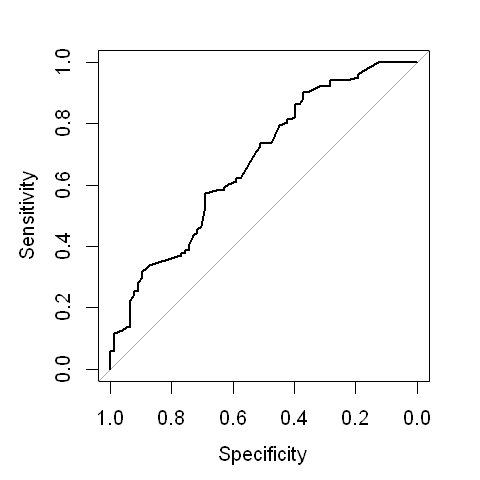

In [48]:
model12_lin_pred_prob <- predict(model12_lin, dum_test12, type=c("response"))

dum_test12$prob <- model12_lin_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test12, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [49]:
lin12_auc <- auc(ROC_curve)
lin12_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.6769

95% CI: 0.5939-0.7529 (2000 stratified bootstrap replicates)

##### Gini

In [50]:
# gini coefficient:
lin12_gini <- 2 * (auc(ROC_curve) - 0.5)
lin12_gini

[1] 0.353871

##### KS statistic

In [51]:
model12_lin_pred <- predict(model12_lin, dum_test12, type=c("response"))

model12_lin_prob <- prediction(model12_lin_pred, dum_test12$Good)

perf <- performance(model12_lin_prob,"tpr","fpr")

lin12_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
lin12_ks

[1] 0.2747075

### Checking 12 logistic regression

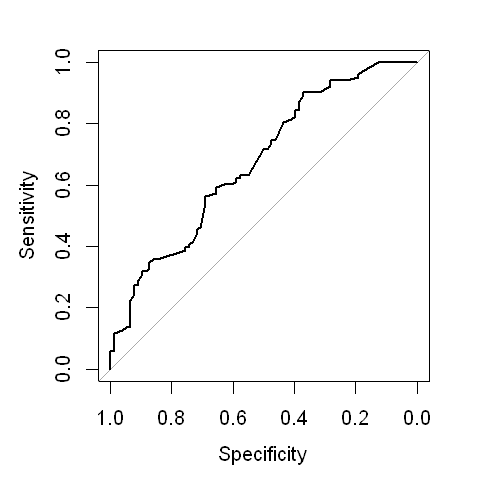

In [52]:
model12_log_pred_prob <- predict(model12_log, dum_test12, type=c("response"))

dum_test12$prob <- model12_log_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test12, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [53]:
log12_auc <- auc(ROC_curve)
log12_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.6748

95% CI: 0.5959-0.7501 (2000 stratified bootstrap replicates)

##### Gini

In [54]:
# gini coefficient:
log12_gini <- 2 * (auc(ROC_curve) - 0.5)
log12_gini

[1] 0.349639

##### KS statistic

In [55]:
model12_log_pred <- predict(model12_log, dum_test12, type=c("response"))

model12_log_prob <- prediction(model12_log_pred, dum_test12$Good)

perf <- performance(model12_log_prob,"tpr","fpr")

log12_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
log12_ks

[1] 0.2747075

### Checking 34 linear regression

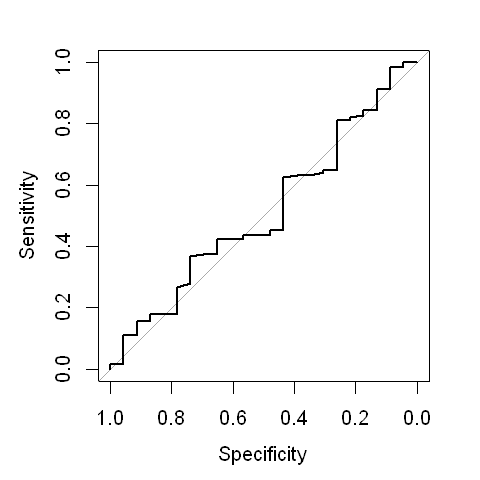

In [56]:
model34_lin_pred_prob <- predict(model34_lin, dum_test34, type=c("response"))

dum_test34$prob <- model34_lin_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test34, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [57]:
lin34_auc <- auc(ROC_curve)
lin34_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.5112

95% CI: 0.3787-0.6352 (2000 stratified bootstrap replicates)

##### Gini

In [58]:
# gini coefficient:
lin34_gini <- 2 * (auc(ROC_curve) - 0.5)
lin34_gini

[1] 0.02241848

##### KS statistic

In [59]:
model34_lin_pred <- predict(model34_lin, dum_test34, type=c("response"))

model34_lin_prob <- prediction(model34_lin_pred, dum_test34$Good)

perf <- performance(model34_lin_prob,"tpr","fpr")

lin34_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
lin34_ks

[1] 0.1063179

### Checking 34 logistic regression

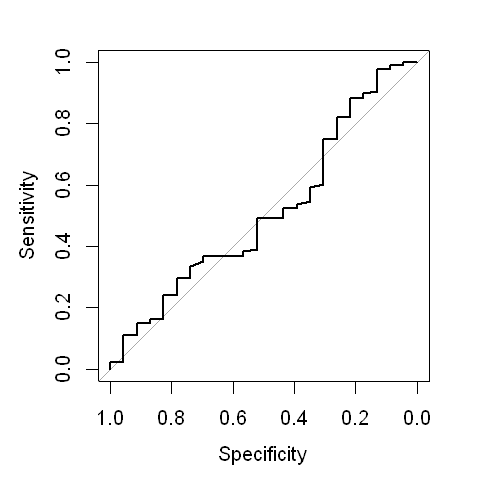

In [60]:
model34_log_pred_prob <- predict(model34_log, dum_test34, type=c("response"))

dum_test34$prob <- model34_log_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test34, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC 

In [61]:
log34_auc <- auc(ROC_curve)
log34_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.5126

95% CI: 0.3818-0.6414 (2000 stratified bootstrap replicates)

##### Gini

In [62]:
# gini coefficient:
log34_gini <- 2 * (auc(ROC_curve) - 0.5)
log34_gini

[1] 0.02513587

##### KS statistic

In [63]:
model34_log_pred <- predict(model34_log, dum_test34, type=c("response"))

model34_log_prob <- prediction(model34_log_pred, dum_test34$Good)

perf <- performance(model34_log_prob,"tpr","fpr")

log34_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
log34_ks

[1] 0.1069973

# Result

In [64]:
Models <- c('Linear Regression- Checking = 1,2','Logistic Regression- Checking = 1,2','Linear Regression- Checking = 3,4','Logistic Regression- Checking = 3,4')
AUC <- c(lin12_auc,log12_auc,lin34_auc,log34_auc)
Gini <- c(lin12_gini,log12_gini,lin34_gini,log34_gini)
KS <- c(lin12_ks,log12_ks,lin34_ks,log34_ks)
data.frame(Models,AUC,Gini,KS)

Models,AUC,Gini,KS
<fct>,<dbl>,<dbl>,<dbl>
"Linear Regression- Checking = 1,2",0.6769355,0.35387105,0.2747075
"Logistic Regression- Checking = 1,2",0.6748195,0.34963903,0.2747075
"Linear Regression- Checking = 3,4",0.5112092,0.02241848,0.1063179
"Logistic Regression- Checking = 3,4",0.5125679,0.02513587,0.1069973


* Models perform better with subset 1 than subset 2

* Gini coefficicent is well below what was expected, may indicate a problem 

* KS statistic for both models with checking 1,2 are exactly the same, may be another problem

* I will re-evaluate both models, using the `step` function to choose a model by AIC in a Stepwise Algorithm.

# Model v2

### Checking 12 linear regression

In [65]:
model12_lin <- lm(Good~1, data=dum_train12)


step(model12_lin, scope=list(lower=Good~1, 
                             upper=Good~duration12+duration12_22+duration22_26+duration26_32+savings1_2+
                             savings3_4+property1+property2+property3+history0_1+history2+history3,trace=1))


Start:  AIC=-503.85
Good ~ 1

                Df Sum of Sq    RSS     AIC
+ property1      1    4.4613 85.041 -520.36
+ duration12     1    3.6378 85.865 -516.87
+ savings1_2     1    3.4484 86.054 -516.07
+ history0_1     1    2.0237 87.479 -510.13
+ savings3_4     1    1.8244 87.678 -509.30
+ duration12_22  1    0.9619 88.541 -505.76
+ duration22_26  1    0.7613 88.742 -504.94
<none>                       89.503 -503.85
+ property3      1    0.3077 89.195 -503.10
+ property2      1    0.1204 89.382 -502.34
+ history3       1    0.0901 89.413 -502.21
+ duration26_32  1    0.0245 89.478 -501.95
+ history2       1    0.0002 89.503 -501.85

Step:  AIC=-520.36
Good ~ property1

                Df Sum of Sq    RSS     AIC
+ savings1_2     1    3.8030 81.238 -534.92
+ duration12     1    2.3779 82.664 -528.63
+ savings3_4     1    1.4476 83.594 -524.57
+ history0_1     1    1.4417 83.600 -524.55
<none>                       85.041 -520.36
+ duration22_26  1    0.4097 84.632 -520.11
+ durati


Call:
lm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, data = dum_train12)

Coefficients:
  (Intercept)      property1     savings1_2     duration12  duration12_22  
      0.64532        0.17792       -0.24486        0.31437        0.16893  
   history0_1  duration26_32       history2  
     -0.22360        0.20157       -0.08891  


In [66]:
model12_lin <- lm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, data = dum_train12)
summary(model12_lin)


Call:
lm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, data = dum_train12)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8928 -0.4005  0.1072  0.3741  0.8231 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.64532    0.07374   8.751  < 2e-16 ***
property1      0.17792    0.05760   3.089  0.00217 ** 
savings1_2    -0.24486    0.05926  -4.132 4.50e-05 ***
duration12     0.31437    0.07440   4.225 3.04e-05 ***
duration12_22  0.16893    0.05722   2.952  0.00337 ** 
history0_1    -0.22360    0.08406  -2.660  0.00817 ** 
duration26_32  0.20157    0.10186   1.979  0.04861 *  
history2      -0.08891    0.05466  -1.626  0.10474    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.46 on 354 degrees of freedom
Multiple R-squared:  0.163,	Adjusted R-squared:  0.1464 
F-statistic: 9.847 on 7 and 354 DF,  p-value: 3.13e-11


### Checking 12 logistic regression

In [67]:
model12_log <- glm(Good~1, data=dum_train12, family='binomial')


step(model12_log, scope=list(lower=Good~1, 
                             upper=Good~duration12+duration12_22+duration22_26+duration26_32+savings1_2+
                             savings3_4+property1+property2+property3+history0_1+history2+history3,trace=1))

Start:  AIC=499.84
Good ~ 1

                Df Deviance    AIC
+ property1      1   479.13 483.13
+ duration12     1   482.19 486.19
+ savings1_2     1   483.30 487.30
+ history0_1     1   489.66 493.66
+ savings3_4     1   489.81 493.81
+ duration12_22  1   493.93 497.93
+ duration22_26  1   494.78 498.78
<none>               497.84 499.84
+ property3      1   496.60 500.60
+ property2      1   497.36 501.36
+ history3       1   497.48 501.48
+ duration26_32  1   497.74 501.74
+ history2       1   497.84 501.84

Step:  AIC=483.13
Good ~ property1

                Df Deviance    AIC
+ savings1_2     1   462.38 468.38
+ duration12     1   468.16 474.16
+ savings3_4     1   472.30 478.30
+ history0_1     1   473.11 479.11
<none>               479.13 483.13
+ duration22_26  1   477.43 483.43
+ duration12_22  1   477.50 483.50
+ duration26_32  1   478.49 484.49
+ property2      1   478.60 484.60
+ property3      1   478.68 484.68
+ history3       1   478.97 484.97
+ history2       1   479


Call:  glm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, family = "binomial", 
    data = dum_train12)

Coefficients:
  (Intercept)      property1     savings1_2     duration12  duration12_22  
       0.7881         0.8626        -1.2187         1.5171         0.7393  
   history0_1  duration26_32       history2  
      -1.0773         0.8849        -0.4431  

Degrees of Freedom: 361 Total (i.e. Null);  354 Residual
Null Deviance:	    497.8 
Residual Deviance: 433.5 	AIC: 449.5

In [68]:
model12_log <- glm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, family = "binomial", 
    data = dum_train12)
summary(model12_log)


Call:
glm(formula = Good ~ property1 + savings1_2 + duration12 + duration12_22 + 
    history0_1 + duration26_32 + history2, family = "binomial", 
    data = dum_train12)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0407  -1.0009   0.5165   0.9190   1.8482  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.7881     0.3629   2.171  0.02990 *  
property1       0.8626     0.2829   3.049  0.00229 ** 
savings1_2     -1.2187     0.3059  -3.984 6.79e-05 ***
duration12      1.5171     0.3796   3.996 6.44e-05 ***
duration12_22   0.7393     0.2653   2.786  0.00533 ** 
history0_1     -1.0773     0.4093  -2.632  0.00849 ** 
duration26_32   0.8849     0.4668   1.896  0.05800 .  
history2       -0.4431     0.2642  -1.677  0.09348 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 497.84  on 361  degrees of freedom
Residual deviance: 433.4

### Checking 34 linear regression

In [69]:
model34_lin <- lm(Good~1, data=dum_train34)

step(model34_lin, scope=list(lower=Good~1, 
                             upper=Good~age24+age24_28+age28_31+age31_34+age34_36+history0_1_2+history3+duration8+duration8_12+
                             duration12_16+duration16_24+duration24_26+duration26_38+amount800+amount800_1600+
                             amount1600_2200+amount2200_3000+amount3000_4400+amount4400_8000,trace=1))

Start:  AIC=-683.91
Good ~ 1

                  Df Sum of Sq    RSS     AIC
+ history3         1   0.91871 31.607 -690.68
+ age24            1   0.54631 31.980 -687.09
+ duration16_24    1   0.50390 32.022 -686.69
+ age28_31         1   0.37952 32.147 -685.50
+ amount3000_4400  1   0.29263 32.234 -684.68
+ amount1600_2200  1   0.27614 32.250 -684.52
+ duration26_38    1   0.26070 32.265 -684.37
+ duration8        1   0.25513 32.271 -684.32
+ age34_36         1   0.22373 32.302 -684.02
+ amount800_1600   1   0.22247 32.304 -684.01
+ duration12_16    1   0.21532 32.311 -683.94
<none>                         32.526 -683.91
+ amount800        1   0.10910 32.417 -682.94
+ age31_34         1   0.08650 32.440 -682.73
+ amount4400_8000  1   0.06331 32.463 -682.51
+ age24_28         1   0.02078 32.505 -682.11
+ amount2200_3000  1   0.00808 32.518 -681.99
+ history0_1_2     1   0.00422 32.522 -681.95
+ duration24_26    1   0.00289 32.523 -681.94
+ duration8_12     1   0.00227 32.524 -681.93

Ste


Call:
lm(formula = Good ~ history3 + age24 + duration16_24 + amount3000_4400 + 
    amount800_1600 + amount2200_3000 + age34_36 + duration8, 
    data = dum_train34)

Coefficients:
    (Intercept)         history3            age24    duration16_24  
        0.84157         -0.16972         -0.15054         -0.09813  
amount3000_4400   amount800_1600  amount2200_3000         age34_36  
        0.14426          0.08704          0.09344          0.10246  
      duration8  
        0.08971  


In [70]:
model34_lin <- lm(formula = Good ~ history3 + age24 + duration16_24 + amount3000_4400 + 
    amount800_1600 + amount2200_3000 + age34_36 + duration8, data = dum_train34)
summary(model34_lin)


Call:
lm(formula = Good ~ history3 + age24 + duration16_24 + amount3000_4400 + 
    amount800_1600 + amount2200_3000 + age34_36 + duration8, 
    data = dum_train34)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03747  0.01417  0.07139  0.15843  0.47868 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.84157    0.03297  25.527  < 2e-16 ***
history3        -0.16972    0.05942  -2.856  0.00459 ** 
age24           -0.15054    0.07021  -2.144  0.03284 *  
duration16_24   -0.09813    0.05089  -1.928  0.05481 .  
amount3000_4400  0.14426    0.05589   2.581  0.01033 *  
amount800_1600   0.08704    0.04335   2.008  0.04555 *  
amount2200_3000  0.09344    0.05521   1.693  0.09160 .  
age34_36         0.10246    0.06289   1.629  0.10433    
duration8        0.08971    0.06175   1.453  0.14734    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3145 on 297 degrees of freedom
Multiple R-squared

### Checking 34 logistic regression

In [71]:
model34_log <- glm(Good~1, data=dum_train34, family='binomial')

step(model34_log, scope=list(lower=Good~1, 
                             upper=Good~age24+age24_28+age28_31+age31_34+age34_36+history0_1_2+history3+duration8+duration8_12+
                             duration12_16+duration16_24+duration24_26+duration26_38+amount800+amount800_1600+
                             amount1600_2200+amount2200_3000+amount3000_4400+amount4400_8000,trace=1))

Start:  AIC=227.67
Good ~ 1

                  Df Deviance    AIC
+ history3         1   218.79 222.79
+ duration16_24    1   221.56 225.56
+ age24            1   221.60 225.60
+ amount3000_4400  1   222.28 226.28
+ duration8        1   222.51 226.51
+ age28_31         1   222.65 226.65
+ age34_36         1   222.93 226.93
+ amount1600_2200  1   223.41 227.41
+ amount800_1600   1   223.44 227.44
+ duration12_16    1   223.46 227.46
+ duration26_38    1   223.50 227.50
<none>                 225.67 227.67
+ age31_34         1   224.77 228.77
+ amount800        1   224.77 228.77
+ amount4400_8000  1   225.11 229.11
+ age24_28         1   225.47 229.47
+ amount2200_3000  1   225.59 229.59
+ history0_1_2     1   225.63 229.63
+ duration24_26    1   225.64 229.64
+ duration8_12     1   225.65 229.65

Step:  AIC=222.79
Good ~ history3

                  Df Deviance    AIC
+ age24            1   214.41 220.41
+ duration16_24    1   214.99 220.99
+ age34_36         1   215.21 221.21
+ duration


Call:  glm(formula = Good ~ history3 + age24 + age28_31 + amount3000_4400 + 
    duration8 + duration12_16 + age34_36, family = "binomial", 
    data = dum_train34)

Coefficients:
    (Intercept)         history3            age24         age28_31  
         1.9655          -1.2121          -1.3427          -0.7874  
amount3000_4400        duration8    duration12_16         age34_36  
         1.2473           1.6467           0.7004           1.3172  

Degrees of Freedom: 305 Total (i.e. Null);  298 Residual
Null Deviance:	    225.7 
Residual Deviance: 199.8 	AIC: 215.8

In [72]:
model34_log <- glm(formula = Good ~ history3 + age24 + age28_31 + amount3000_4400 + 
    duration8 + duration12_16 + age34_36, family = "binomial", 
    data = dum_train34)
summary(model34_log)


Call:
glm(formula = Good ~ history3 + age24 + age28_31 + amount3000_4400 + 
    duration8 + duration12_16 + age34_36, family = "binomial", 
    data = dum_train34)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6977   0.2680   0.3667   0.5121   1.4357  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.9655     0.2704   7.268 3.65e-13 ***
history3         -1.2121     0.4722  -2.567   0.0103 *  
age24            -1.3427     0.5630  -2.385   0.0171 *  
age28_31         -0.7874     0.5018  -1.569   0.1167    
amount3000_4400   1.2473     0.7636   1.633   0.1024    
duration8         1.6467     1.0489   1.570   0.1164    
duration12_16     0.7004     0.4836   1.448   0.1475    
age34_36          1.3172     1.0583   1.245   0.2132    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.67  on 305  degrees of freedom
Residual devi

I'm happy with the coefficients I receive

# Evaluation v2

### checking 12 linear regression

##### ROC

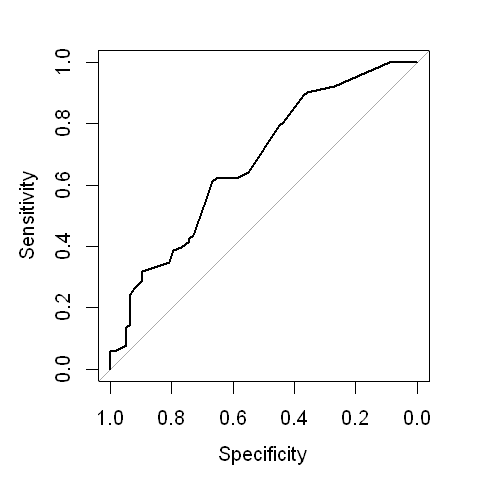

In [73]:
model12_lin_pred_prob <- predict(model12_lin, dum_test12, type=c("response"))

dum_test12$prob <- model12_lin_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test12, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [74]:
lin12_auc <- auc(ROC_curve)
lin12_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.6759

95% CI: 0.5976-0.7543 (2000 stratified bootstrap replicates)

##### Gini

In [75]:
# gini coefficient:
lin12_gini <- 2 * (auc(ROC_curve) - 0.5)
lin12_gini

[1] 0.3518795

##### KS statistic

In [76]:
model12_lin_pred <- predict(model12_lin, dum_test12, type=c("response"))

model12_lin_prob <- prediction(model12_lin_pred, dum_test12$Good)

perf <- performance(model12_lin_prob,"tpr","fpr")

lin12_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
lin12_ks

[1] 0.2783172

### Checking 12 logistic regression

##### ROC

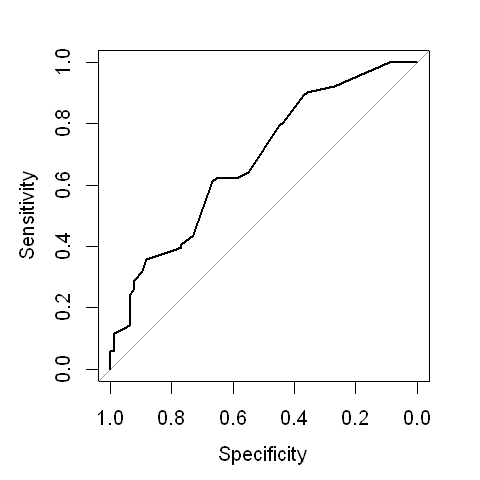

In [77]:
model12_log_pred_prob <- predict(model12_log, dum_test12, type=c("response"))

dum_test12$prob <- model12_log_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test12, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [78]:
log12_auc <- auc(ROC_curve)
log12_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.6825

95% CI: 0.6009-0.7567 (2000 stratified bootstrap replicates)

##### Gini

In [79]:
# gini coefficient:
log12_gini <- 2 * (auc(ROC_curve) - 0.5)
log12_gini

[1] 0.3650734

##### KS statistic

In [80]:
model12_log_pred <- predict(model12_log, dum_test12, type=c("response"))

model12_log_prob <- prediction(model12_log_pred, dum_test12$Good)

perf <- performance(model12_log_prob,"tpr","fpr")

log12_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
log12_ks

[1] 0.2783172

### Checking 34 linear regression

##### ROC

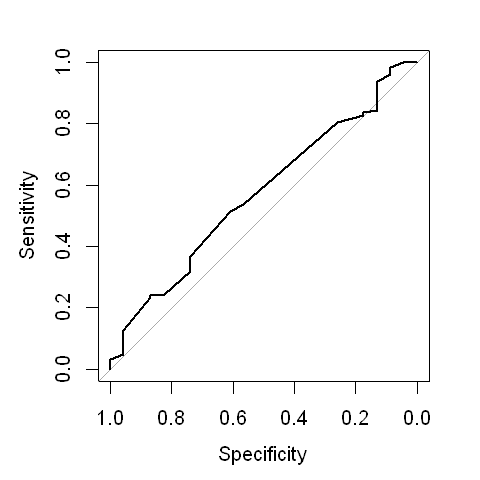

In [81]:
model34_lin_pred_prob <- predict(model34_lin, dum_test34, type=c("response"))

dum_test34$prob <- model34_lin_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test34, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [82]:
lin34_auc <- auc(ROC_curve)
lin34_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.5727

95% CI: 0.4512-0.6985 (2000 stratified bootstrap replicates)

##### Gini

In [83]:
# gini coefficient:
lin34_gini <- 2 * (auc(ROC_curve) - 0.5)
lin34_gini

[1] 0.1453804

##### KS statistic

In [84]:
model34_lin_pred <- predict(model34_lin, dum_test34, type=c("response"))

model34_lin_prob <- prediction(model34_lin_pred, dum_test34$Good)

perf <- performance(model34_lin_prob,"tpr","fpr")

lin34_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
lin34_ks

[1] 0.1243207

### Checking 34 logistic regression

##### ROC

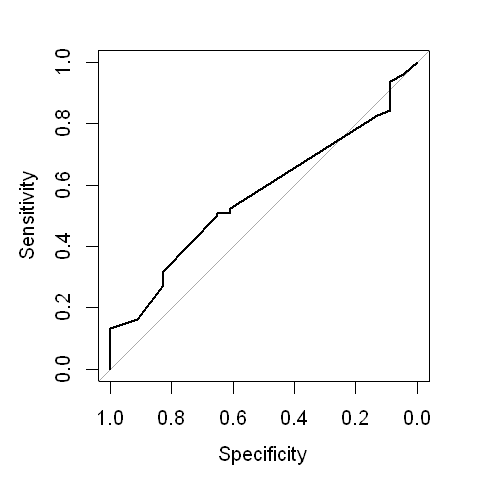

In [85]:
model34_log_pred_prob <- predict(model34_log, dum_test34, type=c("response"))

dum_test34$prob <- model34_log_pred_prob

ROC_curve <- roc(Good ~ prob, data=dum_test34, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=4, repr.plot.height=4)

plot(ROC_curve)

##### AUC

In [86]:
log34_auc <- auc(ROC_curve)
log34_auc
# confidence limits for the auc:
ci(auc(ROC_curve), method = "bootstrap")

Area under the curve: 0.5688

95% CI: 0.4565-0.6748 (2000 stratified bootstrap replicates)

##### Gini

In [87]:
# gini coefficient:
log34_gini <- 2 * (auc(ROC_curve) - 0.5)
log34_gini

[1] 0.1375679

##### KS statistic

In [88]:
model34_log_pred <- predict(model34_log, dum_test34, type=c("response"))

model34_log_prob <- prediction(model34_log_pred, dum_test34$Good)

perf <- performance(model34_log_prob,"tpr","fpr")

log34_ks <- max(attr(perf,'y.values')[[1]]-attr(perf,'x.values')[[1]])
log34_ks


[1] 0.1599864

# Result v2

In [89]:
Models <- c('Linear Regression- Checking = 1,2','Logistic Regression- Checking = 1,2','Linear Regression- Checking = 3,4','Logistic Regression- Checking = 3,4')
AUC <- c(lin12_auc,log12_auc,lin34_auc,log34_auc)
Gini <- c(lin12_gini,log12_gini,lin34_gini,log34_gini)
KS <- c(lin12_ks,log12_ks,lin34_ks,log34_ks)
data.frame(Models,AUC,Gini,KS)

Models,AUC,Gini,KS
<fct>,<dbl>,<dbl>,<dbl>
"Linear Regression- Checking = 1,2",0.6759398,0.3518795,0.2783172
"Logistic Regression- Checking = 1,2",0.6825367,0.3650734,0.2783172
"Linear Regression- Checking = 3,4",0.5726902,0.1453804,0.1243207
"Logistic Regression- Checking = 3,4",0.5687840,0.1375679,0.1599864


All models give suitable coefficient values, but in evaluating my model I discovered these results are not reliable. I obtained improved model performance after using the `step` function, to minimise AIC. However, all models still fall below the acceptable predictive power of >70% [Deloitte](https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Financial-Services/gx-be-aers-fsi-credit-scoring.pdf) of the AUC value. A Geni coefficient of 1 is obtained from a 'perfect' model, where-as a Gini coefficient of 0 is obtained from a 'random' model. All Geni coefficients fall below what is considered good for a model. And finally all KS statistic values obtained from all models are below what we would want. Overall the models do not perform well on either subset. Before determining the 'cutoff' point where the credit would be awarded or not, I would try to improve the model performance.

In future work I would like to tune the hyperparmeters of both models, to try and improve model performance. This would be done with a validation data set. We did not use a validation data set in this project because we did not have enough data, so I would have to obtain more data to create a validation data set to tune the hyperparameters. Perhaps an alternate model, such as SVM or random forest classifier, would perform better than linear regression or logistic regression. 


The models perform much better on subset 1 than on subset 2. A reason for this could be the heavy imbalance of the subset 2 data, with a good/ bad ratio of 397:60. In future I would use oversampling via SMOTE to fix this imbalance.